# Caso de Estudio de Clasificación KNN Neighbors
---
**NoteBook:** DataScientist Julio C. Martínez I.

**Fecha:** 11-Ene-2024

# Introducción
---
Este es un caso de estudio donde vamos a realizar una clasificación sencilla utilizando una de las librerías más completas para python llamada scikit learn. El dataset utilizado será de imagenes pero no trabajaremos con ellas, vamos a trabajar con los pixeles de esas imagenes.

Vamos a trabajar con tres algoritmos diferentes y vamos a evaluar su desempeño, pero antes de eso deberemos realizar un poco de exploración, análisis y visualización del dataset que nos presentan a continuación.

# Librerías Requeridas
---

- pandas
- matplotlib
- seaborn
- scikit-learn

# Tabla de Contenido

- Etapa 1: Importar librerías
- Etapa 2: Exploración de Datos
- Etapa 3: Visualización de Datos
- Etapa 4: Feature Engineering
- Etapa 5 : Crear y Entrenar Modelo
- Etapa 6 : Evaluación del Modelo
- Etapa 7 : Reporte de Clasificación
- Etapa 8 : K-Fold Validación Cruzada
- Etapa 9 : Probar Varios Modelos
- Etapa 10 : Ajustar Hiperparámetros
- Conclusiones

## Etapa 1: Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# asignamos dataset
digits = load_digits()

# descripción del dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Etapa 2: Exploración de Datos

- Hay 1797 instancias
- 64 Atributos
- Imagenes de 8x8

En términos de pixeles, tenemos en el dataset una escala de grises en escala del 0 al 16. El cero representa el color blanco totalmente y el 16 representa el color negro. Cada una de las imágenes está dividida en 8x8 pixeles y cada pixel tiene un valor de intensidad, y esa intensidad se representa con esos valores que van del 0 al 16.

In [3]:
# tarjet del objetivo
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

El array que se muestra significa que la primera imagen, dentro de la escala de grises, tiene una intensidad correspondiente a 0, es decir, es totalmente negra. El segundo valor que encontramos en el dataset corresponde a la imagen número 99 y cuenta con una escala de grises de valor 4. El tercer valor corresponde a la imagen No 199 y tiene el valor de 1.

En otras palabras, imprimimos los valores de las escalas de grises del dataset en múltiplos de 100.

In [4]:
# algunos datos sobre el dataset
print('Tamaño del dataset:', digits.data.shape)
print('Tamaño del target:',digits.target.shape)

Tamaño del dataset: (1797, 64)
Tamaño del target: (1797,)


Se puede comprobar que el set de datos cuenta con 1797 filas y 64 columnas. Para nuestro siguiente paso, vamos a visualizar la imagen #15 del dataset, ojo no esperes verla en el formato como tal, ya que como mensionamos anteriormente estamos trabajando con pixeles, por lo tanto lo que vamos a visualizar son los pixeles de esa imagen y específicamente su escala de grises.

In [5]:
# revisando la imagen #15
digits.images[15]

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

Una de las reglas del machine learning nos dice que para trabajar con imágenes es importante transformar nuestras matrices multidimensionales en matrises bidimencionales. Por fortuna este dataset ya cuenta con esta transformación así que vamos a visualizar este dataset "aplanado", por llamarlo de alguna manera.

In [6]:
# arreglo en 1x64
digits.data[15]

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

## Etapa 3: Visualización de Datos

Para esta etapa vamos a realizar un poco de visualización para familiarizarnos más en profunidad con lo que hemos explorado anteriormente, para ello, vamos a crear primero una cuadrícula.

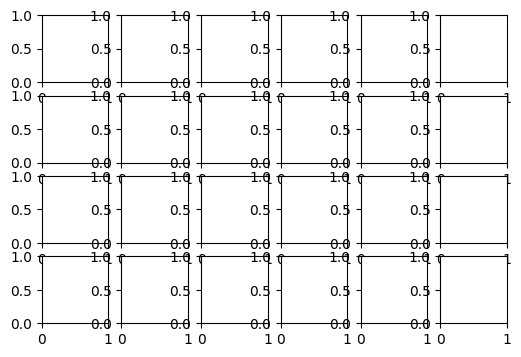

In [7]:
# dibujar una cuadricula
figure,axes=plt.subplots(nrows=4,ncols=6,figsize=(6,4))

Ahora vamos a iterar sobre esta cuadrícula para traer las primeras 24 imágenes

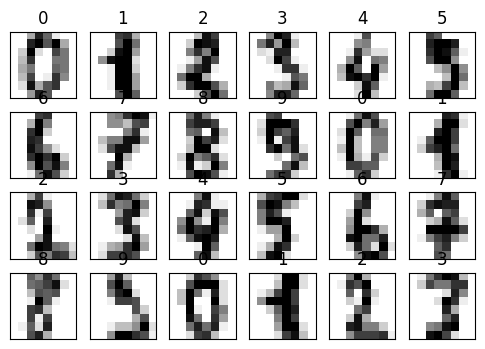

In [8]:
figure,axes=plt.subplots(nrows=4,ncols=6,figsize=(6,4))

for item in zip(axes.ravel(), digits.images, digits.target):
  axes,image,target=item
  axes.imshow(image,cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)

plt.tight_layout
plt.show();

Ahora podemos ver los números que estabamos búscando junto con su target, es decir, las manchas en color negro. Nuestro algoritmo debe poder discernir entre las manchas negras y asignarle el número correcto.

## Etapa 4: Feature Engineering
---

En esta etapa vamos a dividir nuestro set de entrenamiento y set de prueba para decirle a nuestro modelo qué es lo que debe aprender y qué es lo que debe poner a prueba.

In [9]:
X_train,X_test,y_train,y_test = train_test_split(digits.data, digits.target, random_state=12345)

In [10]:
print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del target de entrenamiento:', y_train.shape)
print('- - - ' * 7)
print('Tamaño del set de prueba:', X_test.shape)
print('Tamaño del target de prueba:', y_test.shape)

Tamaño del set de entrenamiento: (1347, 64)
Tamaño del target de entrenamiento: (1347,)
- - - - - - - - - - - - - - - - - - - - - 
Tamaño del set de prueba: (450, 64)
Tamaño del target de prueba: (450,)


## Etapa 5 : Crear y Entrenar Modelo

Para nuestro caso de estudio vamos a trabajar con el algorimto KNN Classifier.

In [11]:
# instanciar modelo
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Ya hemos creado y entrenado nuestro modelo. Lo que hizo fue aprender de las matrices que mostramos anteriormente y de esa manera aprende para predecir los números que se le dan.

Vamos a comparar los resultados reales vs los resultados predichos por el algoritmo.

In [12]:
# predicciones
predict = knn.predict(X_test)

# valores reales
esperado = y_test

# comparacion
print('valores predichos :', predict[:25])
print('valores esperados :', esperado[:25])

valores predichos : [6 8 5 3 5 6 6 4 5 0 2 1 8 4 5 8 1 6 7 4 3 8 0 6 1]
valores esperados : [6 8 5 3 5 6 6 4 5 0 2 1 8 4 5 8 1 6 7 4 3 8 0 6 1]


In [13]:
# buscar los valores erroneos
error = [(p,e) for (p,e) in zip(predict,esperado) if p!=e]
error

[(1, 8), (1, 8), (7, 4)]

A través de la comprensión de listas podemos ver cuáles fueron los valores erroneos. Dentro de los 450 registros el algoritmo KNN solo tuvo 3 errores.

## Etapa 6 : Evaluación del Modelo
---

Para esta etapa vamos a comprobar el desempeño de nuestro modelo, para ello vamos a evaluar si el modelo es bueno o no. Ahora queremos sacar porcentajes y ver donde se equivoco.

In [14]:
print(f'puntuación de knn: {knn.score(X_test,y_test):.2%}')

puntuación de knn: 99.33%


Ahora vamos a hacer una matriz de confusión para ver los hits y misses para una clase dada.

In [15]:
confusion = confusion_matrix(esperado, predict)
confusion

array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 44]])

La matriz de confusión nos ayuda a entender mejor en dónde se encuentran nuestros errores. Estos son los 3 errores que mencionamos en la sección anterior y que podemos visualizar más claramente dentro de nuestra matriz.

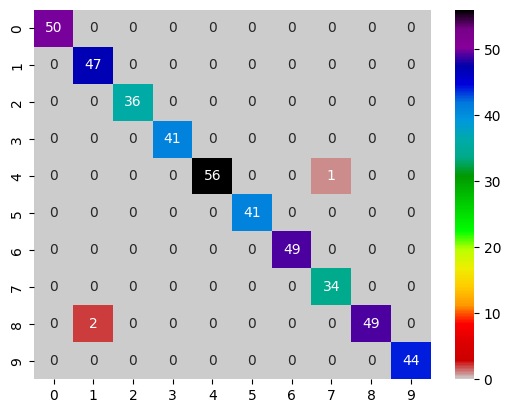

In [16]:
# visualizar matriz de confusion
confusion_df = pd.DataFrame(
    confusion,
    index=range(10),
    columns=range(10)
    )
axes = sns.heatmap(
    confusion_df,
    annot=True,
    cmap='nipy_spectral_r'
    )

## Etapa 7 : Reporte de Clasificación

In [17]:
nombres = [str(digit) for digit in digits.target_names]

print(
    classification_report(
        esperado,
        predict,
        target_names=nombres
        )
    )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      1.00      0.98        47
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      0.98      0.99        57
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        49
           7       0.97      1.00      0.99        34
           8       1.00      0.96      0.98        51
           9       1.00      1.00      1.00        44

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



## Etapa 8 : K-Fold Validación Cruzada

A pesar de la presición de nuestro modelo, vamos a realizar un ejercicio de validación para mejorarlo aún más

In [18]:
# instanciamos la validacion
kfold = KFold(
    n_splits=10,
    random_state=12345,
    shuffle=True)

In [19]:
# obtenemos la puntuación
puntuacion = cross_val_score(
    estimator=knn,
    X=digits.data,
    y=digits.target,
    cv=kfold
)

In [20]:
# promedio y desviación estándar de los resultados
print('Reporte de Resultados')
print(f'prom :{puntuacion.mean():.2}')
print(f'desv :{puntuacion.std():.2}')

Reporte de Resultados
prom :0.99
desv :0.01


## Etapa 9 : Probar Varios Modelos
---

Vamos a utilizar otros dos clasificadores que nos ayudarán a buscar una mejor respuesta o quizás no, pero no lo sabremos hasta probarlos. Estos serán:

- SVC Classifier
- GaussianNB

In [21]:
# armamos un diccionario
estimadores={
    "KNeighborsClassifier": knn,
    "SVC" : SVC(gamma="scale"),
    "GaussianNB": GaussianNB()
}

# ejecución de los modelos

for nombreestimador,objetoestimador, in estimadores.items():
  kfold = KFold(
      n_splits=10,
      random_state=12345,
      shuffle=True
      )
  puntuacion = cross_val_score(
      estimator=objetoestimador,
      X=digits.data,
      y=digits.target,
      cv=kfold
      )
  print(
      f'{nombreestimador:>20}'+f'Puntuación Promedio={puntuacion.mean():.2%};'+f'Desviación Estándar={puntuacion.std():.2%}'
      )

KNeighborsClassifierPuntuación Promedio=98.83%;Desviación Estándar=1.01%
                 SVCPuntuación Promedio=98.89%;Desviación Estándar=0.90%
          GaussianNBPuntuación Promedio=84.19%;Desviación Estándar=3.42%


## Etapa 10 : Ajustar Hiperparámetros
---

Aunque ya contamos en sí con un buen modelo, vamos a realizar un ajuste de hiperparámetros para mejorar la exactitud de nuestro modelo.

In [22]:
for k in range(1,20,2):
  kfold = KFold(
      n_splits=10,
      random_state=12345,
      shuffle=True
      )
  knn = KNeighborsClassifier(n_neighbors=k)
  puntuacion=cross_val_score(
      estimator=knn,
      X=digits.data,
      y=digits.target,
      cv=kfold
      )
  print(
      f'k={k:<20};'+f'Puntuación Promedio={puntuacion.mean():.2%};'+f'Desviación Estándar={puntuacion.std():.2%}'
      )

k=1                   ;Puntuación Promedio=98.94%;Desviación Estándar=0.88%
k=3                   ;Puntuación Promedio=98.89%;Desviación Estándar=0.97%
k=5                   ;Puntuación Promedio=98.83%;Desviación Estándar=1.01%
k=7                   ;Puntuación Promedio=98.61%;Desviación Estándar=0.94%
k=9                   ;Puntuación Promedio=98.33%;Desviación Estándar=1.03%
k=11                  ;Puntuación Promedio=98.33%;Desviación Estándar=1.14%
k=13                  ;Puntuación Promedio=98.33%;Desviación Estándar=1.22%
k=15                  ;Puntuación Promedio=98.16%;Desviación Estándar=1.20%
k=17                  ;Puntuación Promedio=97.83%;Desviación Estándar=1.28%
k=19                  ;Puntuación Promedio=97.77%;Desviación Estándar=1.41%


## Conclusiones

Después de pasar un tiempo trabajando con los clasificadores de scikit-learn hemos visto lo siguiente:

- Hemos realizado un proyecto sencillo de machine learning en el cuál se ha observado el trabajo de algoritmos como KNN, SVC y Gaussian.
- Durante este proyecto hemos realizado la evaluación de los modelos utilizando métricas como la matriz de confusión, accuracy, presicion, recall y f1-score.
- Hemos visualizado el dataset a través de herramientas como seaborn donde podemos ver los números en imágenes de las que aprenderán los algoritmos.
- Encontramos que el mejor algoritmo para este proyecto fue SVC Classifier con 98.89% puntos.
- También descubrimos que al ajustar los hiperparámetros del número de hojas (folds) también disminuye la puntuación promedio de nuestro algoritmo.

Espero te haya gustado este proyecto, recuerda que este fue solo una práctica para observar cómo es que trabajan nuestros algoritmos, si deseas ver esto aplicado a un caso real puedes ver alguno de mis proyectos de machine learning, saludos.